# Cancer Type Classification

This notebook implements a comprehensive workflow for cancer type classification using pathology images.

Author: [Your Name]  
Date: [Current Date]

## 1. Setup and Imports

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from tqdm.notebook import tqdm
import random
import warnings
import re
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Data Understanding

In this section, we'll explore the cancer type dataset to understand its structure, content, and characteristics.

In [20]:
# Import functions
import sys
import importlib
sys.path.append("D:/PLUMOSCAN/PulmoScan")
import data_understanding
importlib.reload(data_understanding)
from data_understanding import (
    load_data, clean_data, merge_datasets, 
    analyze_histology_subtypes, analyze_clinical_data, analyze_image_data,analyze_cancer_types
)

In [21]:
# Load data
clinical, pathology = load_data()
if clinical is None or pathology is None:
    print("Error: Could not load datasets. Exiting.")
else:
    print("Clinical data shape:", clinical.shape)
    print("Pathology data shape:", pathology.shape)

2025-04-28 18:19:16,575 - INFO - Chargement des données...
2025-04-28 18:19:16,626 - INFO - Données cliniques chargées: (2150, 48)
2025-04-28 18:19:16,626 - INFO - Données pathologiques chargées: (1252, 279)


Clinical data shape: (2150, 48)
Pathology data shape: (1252, 279)


In [22]:
# Explore data types and missing values
print(f"Clinical data is None: {clinical is None}")
print(f"Pathology data is None: {pathology is None}")

Clinical data is None: False
Pathology data is None: False


In [23]:
# Clean and merge datasets
clinical = clean_data(clinical, "cliniques")
pathology = clean_data(pathology, "pathologiques")
merged_df = merge_datasets(clinical, pathology)
print("Merged dataset shape:", merged_df.shape)
print("Merged dataset columns:", list(merged_df.columns))

2025-04-28 18:19:18,590 - INFO - Nettoyage des données cliniques...
2025-04-28 18:19:18,645 - INFO - Shape initiale: (2150, 48) -> Finale: (2150, 48)
2025-04-28 18:19:18,647 - INFO - Nettoyage des données pathologiques...
2025-04-28 18:19:18,729 - INFO - Shape initiale: (1252, 279) -> Finale: (1252, 94)
2025-04-28 18:19:18,729 - INFO - Fusion des datasets...
2025-04-28 18:19:18,742 - INFO - Dataset fusionné: 452 cas, 141 features


Merged dataset shape: (452, 141)
Merged dataset columns: ['dataset_version_x', 'pid', 'candx_days', 'clinical_m', 'clinical_m_7thed', 'clinical_n', 'clinical_n_7thed', 'clinical_stag', 'clinical_t', 'clinical_t_7thed', 'de_grade', 'de_stag', 'de_stag_7thed', 'de_type', 'first_lc', 'lc_behav', 'lc_grade', 'lc_morph', 'lc_order_x', 'lc_topog', 'lesionsize', 'loccar', 'loclhil', 'loclin', 'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil', 'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk', 'path_m', 'path_m_7thed', 'path_n', 'path_n_7thed', 'path_stag', 'path_t', 'path_t_7thed', 'source_best_stage', 'stage_only', 'stage_sum', 'study_yr', 'topog_source', 'valcsg', 'dataset_version_y', 'image_filename', 'image_filesize', 'lc_order_y', 'selected_path', 'selected_path_batch', 'block_annotated', 'block_color1', 'block_color2', 'block_dnacore_cnt', 'block_dnacore_orig_cnt', 'block_dnacore_vials', 'block_has_dnacore', 'block_has_tmacore', 'block_slide_cnt', 'block_tmacore_cnt', 'blo

In [24]:
# Analyze cancer types
merged_df = analyze_cancer_types(merged_df)

2025-04-28 18:19:19,480 - INFO - Analyse des types de cancer...
2025-04-28 18:19:19,767 - INFO - Distribution:
cancer_type
Adenocarcinoma                  165
Squamous Cell Carcinoma         100
Unknown                          70
Neuroendocrine Carcinoma         48
Bronchioloalveolar Carcinoma     41
Large Cell Carcinoma             14
Small Cell Carcinoma             14
Name: count, dtype: int64


In [25]:
# Analyze histology subtypes
subtype_dist = analyze_histology_subtypes(merged_df)
print("Distribution des sous-types :")
print(subtype_dist.head(20) if subtype_dist is not None else "Aucun sous-type trouvé")

2025-04-28 18:19:23,130 - INFO - Analyse des sous-types histologiques...
2025-04-28 18:19:23,555 - INFO - Top 20 sous-types:
roi_histology_subtype1
ACINAR ADENOCARCINOMA                         99
SQUAMOUS CELL CARCINOMA                       94
NON-TUMOR LUNG                                48
BAC NONMUCINOUS                               26
LARGE CELL CARCINOMA                          26
PAPILLARY ADENOCARCINOMA                      25
SMALL CELL CARCINOMA                          19
ADENOCARCINOMA, MIXED SUBTYPE                 18
LARGE CELL NEUROENDOCRINE CARCINOMA           15
ADENOCARCINOMA, NOS                           15
SQUAMOUS CELL CARCINOMA, BASALOID             13
SOLID ADENOCARCINOMA WITH MUCIN PRODUCTION     8
CLEAR CELL ADENOCARCINOMA                      8
BAC MUCINOUS                                   7
ADENOSQUAMOUS CARCINOMA                        4
CARCINOID TUMOR, TYPICAL                       4
MUCINOUS ("COLLOID") CARCINOMA                 3
NORMAL LYMPH NODE  

Distribution des sous-types :
roi_histology_subtype1
ACINAR ADENOCARCINOMA                         99
SQUAMOUS CELL CARCINOMA                       94
NON-TUMOR LUNG                                48
BAC NONMUCINOUS                               26
LARGE CELL CARCINOMA                          26
PAPILLARY ADENOCARCINOMA                      25
SMALL CELL CARCINOMA                          19
ADENOCARCINOMA, MIXED SUBTYPE                 18
LARGE CELL NEUROENDOCRINE CARCINOMA           15
ADENOCARCINOMA, NOS                           15
SQUAMOUS CELL CARCINOMA, BASALOID             13
SOLID ADENOCARCINOMA WITH MUCIN PRODUCTION     8
CLEAR CELL ADENOCARCINOMA                      8
BAC MUCINOUS                                   7
ADENOSQUAMOUS CARCINOMA                        4
CARCINOID TUMOR, TYPICAL                       4
MUCINOUS ("COLLOID") CARCINOMA                 3
NORMAL LYMPH NODE                              2
CARCINOMA NOS                                  2
SQUAMOUS CELL CA

In [26]:
from data_understanding import (
    load_data,
    clean_data,
    merge_datasets,
    analyze_histology_subtypes
)

# Chargez les données
clinical, pathology = load_data()
clinical = clean_data(clinical, "cliniques")
pathology = clean_data(pathology, "pathologiques")
merged_df = merge_datasets(clinical, pathology)

# Analyse
subtype_dist = analyze_histology_subtypes(merged_df)
print("Distribution des sous-types :")
print(subtype_dist.head(20))

2025-04-28 18:19:25,553 - INFO - Chargement des données...
2025-04-28 18:19:25,607 - INFO - Données cliniques chargées: (2150, 48)
2025-04-28 18:19:25,608 - INFO - Données pathologiques chargées: (1252, 279)
2025-04-28 18:19:25,609 - INFO - Nettoyage des données cliniques...
2025-04-28 18:19:25,635 - INFO - Shape initiale: (2150, 48) -> Finale: (2150, 48)
2025-04-28 18:19:25,635 - INFO - Nettoyage des données pathologiques...
2025-04-28 18:19:25,722 - INFO - Shape initiale: (1252, 279) -> Finale: (1252, 94)
2025-04-28 18:19:25,723 - INFO - Fusion des datasets...
2025-04-28 18:19:25,733 - INFO - Dataset fusionné: 452 cas, 141 features
2025-04-28 18:19:25,734 - INFO - Analyse des sous-types histologiques...
2025-04-28 18:19:26,138 - INFO - Top 20 sous-types:
roi_histology_subtype1
ACINAR ADENOCARCINOMA                         99
SQUAMOUS CELL CARCINOMA                       94
NON-TUMOR LUNG                                48
BAC NONMUCINOUS                               26
LARGE CELL CAR

Distribution des sous-types :
roi_histology_subtype1
ACINAR ADENOCARCINOMA                         99
SQUAMOUS CELL CARCINOMA                       94
NON-TUMOR LUNG                                48
BAC NONMUCINOUS                               26
LARGE CELL CARCINOMA                          26
PAPILLARY ADENOCARCINOMA                      25
SMALL CELL CARCINOMA                          19
ADENOCARCINOMA, MIXED SUBTYPE                 18
LARGE CELL NEUROENDOCRINE CARCINOMA           15
ADENOCARCINOMA, NOS                           15
SQUAMOUS CELL CARCINOMA, BASALOID             13
SOLID ADENOCARCINOMA WITH MUCIN PRODUCTION     8
CLEAR CELL ADENOCARCINOMA                      8
BAC MUCINOUS                                   7
ADENOSQUAMOUS CARCINOMA                        4
CARCINOID TUMOR, TYPICAL                       4
MUCINOUS ("COLLOID") CARCINOMA                 3
NORMAL LYMPH NODE                              2
CARCINOMA NOS                                  2
SQUAMOUS CELL CA

In [27]:
# Analyze clinical data
merged_df = analyze_clinical_data(merged_df)

2025-04-28 18:19:27,807 - INFO - Analyse des données cliniques...



Résumé des colonnes cliniques :
        clinical_stag    de_grade     de_stag  de_stag_7thed    lc_grade  \
count      452.000000  452.000000  452.000000     452.000000  452.000000   
unique            NaN         NaN         NaN            NaN         NaN   
top               NaN         NaN         NaN            NaN         NaN   
freq              NaN         NaN         NaN            NaN         NaN   
mean       232.174779    3.367257  182.553097     173.451327    3.898230   
std        238.818893    1.336039  126.517413      91.646868    2.970408   
min        110.000000    1.000000  110.000000     110.000000    1.000000   
25%        110.000000    3.000000  110.000000     110.000000    2.000000   
50%        110.000000    3.000000  110.000000     110.000000    3.000000   
75%        310.000000    4.000000  220.000000     220.000000    4.000000   
max        999.000000    8.000000  994.000000     400.000000    9.000000   

         path_stag  source_best_stage  stage_only   st

2025-04-28 18:19:37,587 - INFO - Analyse clinique terminée



Valeurs manquantes dans les colonnes cliniques :
clinical_stag              0
de_grade                   0
de_stag                    0
de_stag_7thed              0
lc_grade                   0
path_stag                  0
source_best_stage          0
stage_only                 0
stage_sum                  0
image_filename             0
image_filesize             0
block_worst_grade          0
block_worst_grade_qual     0
roi_NThist_Hemorrhage1     0
roi_NThist_Hemorrhage2     0
roi_highest_grade1         0
roi_highest_grade2         0
roi_highest_grade_qual1    0
dtype: int64


In [28]:
# Build image paths
image_col = None
possible_cols = ['image_filename', 'filename', 'nom_image', 'image_name']
for col in possible_cols:
    if col in merged_df.columns:
        image_col = col
        break
if image_col is None:
    for col in merged_df.columns:
        if merged_df[col].dtype == 'object' and merged_df[col].str.endswith('.svs').any():
            image_col = col
            break
if image_col is None:
    raise ValueError("Aucune colonne contenant des noms de fichiers SVS trouvée")

print(f"Colonne des noms de fichiers: {image_col}")
print("Exemple de noms de fichiers:", merged_df[image_col].head().tolist())

Colonne des noms de fichiers: image_filename
Exemple de noms de fichiers: ['11445.SVS', 'NLSI0000526.SVS', '9485.SVS', '9545.SVS', '9738.SVS']


In [29]:
def find_image_path(filename):
    if pd.isna(filename):
        return None
    base = os.path.splitext(str(filename))[0]
    variations = [
        re.sub(r'[^A-Z0-9]', '', base.upper()),
        base.upper().replace(' ', '_'),
        base.upper().replace('-', ''),
        base.upper(),
        filename.upper()
    ]
    for dir_path in [
        "D:/PLUMOSCAN/PulmoScan/data/batch_3_adenocarcinoma",
        "D:/PLUMOSCAN/PulmoScan/data/batch_5_squamous",
        "D:/PLUMOSCAN/PulmoScan/data/batch_8_BAC"
    ]:
        for var in variations:
            for ext in ['.svs', '.tiff', '.tif']:
                path = Path(dir_path) / (var + ext)
                if path.exists():
                    return str(path)
        # Recherche partielle
        for ext in ['.svs', '.tiff', '.tif']:
            for f in Path(dir_path).glob(f'*{base.upper()}*{ext}'):
                return str(f)
    return None

In [30]:
def find_image_path_parallel(df, image_col):
    with ThreadPoolExecutor() as executor:
        paths = list(executor.map(find_image_path, df[image_col]))
    return paths

In [31]:
merged_df['image_path'] = find_image_path_parallel(merged_df, image_col)

# Comptez les images trouvées
print(f"Images trouvées : {merged_df['image_path'].notna().sum()}/{len(merged_df)}")

# Affichez les premiers chemins
print(merged_df['image_path'].head())

Images trouvées : 144/452
0                                                 None
1    D:\PLUMOSCAN\PulmoScan\data\batch_3_adenocarci...
2    D:\PLUMOSCAN\PulmoScan\data\batch_3_adenocarci...
3     D:\PLUMOSCAN\PulmoScan\data\batch_8_BAC\9545.svs
4                                                 None
Name: image_path, dtype: object


In [34]:
print(f"Columns in merged_df: {merged_df.columns.tolist()}")

Columns in merged_df: ['dataset_version_x', 'pid', 'candx_days', 'clinical_m', 'clinical_m_7thed', 'clinical_n', 'clinical_n_7thed', 'clinical_stag', 'clinical_t', 'clinical_t_7thed', 'de_grade', 'de_stag', 'de_stag_7thed', 'de_type', 'first_lc', 'lc_behav', 'lc_grade', 'lc_morph', 'lc_order_x', 'lc_topog', 'lesionsize', 'loccar', 'loclhil', 'loclin', 'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil', 'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk', 'path_m', 'path_m_7thed', 'path_n', 'path_n_7thed', 'path_stag', 'path_t', 'path_t_7thed', 'source_best_stage', 'stage_only', 'stage_sum', 'study_yr', 'topog_source', 'valcsg', 'dataset_version_y', 'image_filename', 'image_filesize', 'lc_order_y', 'selected_path', 'selected_path_batch', 'block_annotated', 'block_color1', 'block_color2', 'block_dnacore_cnt', 'block_dnacore_orig_cnt', 'block_dnacore_vials', 'block_has_dnacore', 'block_has_tmacore', 'block_slide_cnt', 'block_tmacore_cnt', 'block_tmacore_nontumor_cnt', 'block_tm

In [35]:
# Ajouter une vérification pour image_col
if 'image_col' not in locals():
    image_col = 'image_path'  # Utiliser image_path comme colonne par défaut

# Vérifier les colonnes disponibles
print(f"Columns in merged_df: {merged_df.columns.tolist()}")

# S'assurer que major_category existe
if 'major_category' not in merged_df.columns:
    # Utiliser de_type comme colonne pour les types de cancer
    cancer_type_col = 'de_type'  # Ajustez si une autre colonne est plus appropriée
    if cancer_type_col in merged_df.columns:
        print(f"Using {cancer_type_col} as cancer type column")
        merged_df['major_category'] = merged_df[cancer_type_col]
    else:
        print(f"Column {cancer_type_col} not found in merged_df. Cannot proceed with saving missing images.")
        missing_images = pd.DataFrame()  # DataFrame vide pour éviter les erreurs
else:
    cancer_type_col = 'cancer_type' if 'cancer_type' in merged_df.columns else None

# Sauvegarder les lignes sans correspondance
available_cols = ['pid', image_col]
if cancer_type_col and cancer_type_col in merged_df.columns:
    available_cols.append(cancer_type_col)
if 'major_category' in merged_df.columns:
    available_cols.append('major_category')

print(f"Selecting columns: {available_cols}")
missing_images = merged_df[merged_df['image_path'].isna()][available_cols]

if not missing_images.empty:
    os.makedirs('D:/PLUMOSCAN/PulmoScan/output', exist_ok=True)
    missing_images.to_csv('D:/PLUMOSCAN/PulmoScan/output/missing_images_main.csv', index=False)
    print(f"Fichiers manquants sauvegardés dans D:/PLUMOSCAN/PulmoScan/output/missing_images_main.csv")
else:
    print("Aucune image manquante trouvée.")

Columns in merged_df: ['dataset_version_x', 'pid', 'candx_days', 'clinical_m', 'clinical_m_7thed', 'clinical_n', 'clinical_n_7thed', 'clinical_stag', 'clinical_t', 'clinical_t_7thed', 'de_grade', 'de_stag', 'de_stag_7thed', 'de_type', 'first_lc', 'lc_behav', 'lc_grade', 'lc_morph', 'lc_order_x', 'lc_topog', 'lesionsize', 'loccar', 'loclhil', 'loclin', 'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil', 'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk', 'path_m', 'path_m_7thed', 'path_n', 'path_n_7thed', 'path_stag', 'path_t', 'path_t_7thed', 'source_best_stage', 'stage_only', 'stage_sum', 'study_yr', 'topog_source', 'valcsg', 'dataset_version_y', 'image_filename', 'image_filesize', 'lc_order_y', 'selected_path', 'selected_path_batch', 'block_annotated', 'block_color1', 'block_color2', 'block_dnacore_cnt', 'block_dnacore_orig_cnt', 'block_dnacore_vials', 'block_has_dnacore', 'block_has_tmacore', 'block_slide_cnt', 'block_tmacore_cnt', 'block_tmacore_nontumor_cnt', 'block_tm

In [36]:
print(merged_df['de_type'].unique())

[8140. 8250. 8070. 8042. 8013. 8240. 8012. 8253. 8071. 8252. 8046. 8260.
 8323. 8560. 8310. 8041. 8249. 8075. 8480. 8010. 8072. 8550. 8246. 8255.
 8481. 8083. 8000. 8045. 8033. 8490.]


In [37]:
print(merged_df['lc_morph'].unique())
print(merged_df['roi_histology_cat1'].unique())

[8140 8250 8070 8042 8013 8240 8010 8046 8012 8253 8071 8252 8260 8323
 8560 8310 8041 8249 8480 8550 8246 8255 8481 8000 8045 8033 8490 8072]
[2. 3. 1. 6. 8. 9. 5. 4. 7.]


In [41]:
# Ajouter une vérification pour image_col
if 'image_col' not in locals():
    image_col = 'image_path'  # Utiliser image_path pour la cohérence

# Vérifier les colonnes disponibles
print(f"Columns in merged_df: {merged_df.columns.tolist()}")

# S'assurer que major_category existe
if 'major_category' not in merged_df.columns:
    # Utiliser roi_histology_cat1 comme colonne pour les types de cancer
    cancer_type_col = 'roi_histology_cat1'  # Ajusté pour utiliser roi_histology_cat1
    if cancer_type_col in merged_df.columns:
        print(f"Using {cancer_type_col} as cancer type column")
        merged_df['major_category'] = merged_df[cancer_type_col]
    else:
        print(f"Column {cancer_type_col} not found in merged_df. Cannot proceed with saving missing images.")
        missing_images = pd.DataFrame()  # DataFrame vide pour éviter les erreurs
else:
    cancer_type_col = 'cancer_type' if 'cancer_type' in merged_df.columns else None

# Sauvegarder les lignes sans correspondance
available_cols = ['pid', image_col]
if cancer_type_col and cancer_type_col in merged_df.columns:
    available_cols.append(cancer_type_col)
if 'major_category' in merged_df.columns:
    available_cols.append('major_category')

print(f"Selecting columns: {available_cols}")
missing_images = merged_df[merged_df['image_path'].isna()][available_cols]

if not missing_images.empty:
    os.makedirs('D:/PLUMOSCAN/PulmoScan/output', exist_ok=True)
    missing_images.to_csv('D:/PLUMOSCAN/PulmoScan/output/missing_images_main.csv', index=False)
    print(f"Fichiers manquants sauvegardés dans D:/PLUMOSCAN/PulmoScan/output/missing_images_main.csv")
else:
    print("Aucune image manquante trouvée.")

Columns in merged_df: ['dataset_version_x', 'pid', 'candx_days', 'clinical_m', 'clinical_m_7thed', 'clinical_n', 'clinical_n_7thed', 'clinical_stag', 'clinical_t', 'clinical_t_7thed', 'de_grade', 'de_stag', 'de_stag_7thed', 'de_type', 'first_lc', 'lc_behav', 'lc_grade', 'lc_morph', 'lc_order_x', 'lc_topog', 'lesionsize', 'loccar', 'loclhil', 'loclin', 'locllow', 'loclmsb', 'loclup', 'locmed', 'locoth', 'locrhil', 'locrlow', 'locrmid', 'locrmsb', 'locrup', 'locunk', 'path_m', 'path_m_7thed', 'path_n', 'path_n_7thed', 'path_stag', 'path_t', 'path_t_7thed', 'source_best_stage', 'stage_only', 'stage_sum', 'study_yr', 'topog_source', 'valcsg', 'dataset_version_y', 'image_filename', 'image_filesize', 'lc_order_y', 'selected_path', 'selected_path_batch', 'block_annotated', 'block_color1', 'block_color2', 'block_dnacore_cnt', 'block_dnacore_orig_cnt', 'block_dnacore_vials', 'block_has_dnacore', 'block_has_tmacore', 'block_slide_cnt', 'block_tmacore_cnt', 'block_tmacore_nontumor_cnt', 'block_tm

In [42]:
print(merged_df['lc_morph'].unique())
print(merged_df['roi_histology_cat1'].unique())
print(merged_df['roi_histology_cat2'].unique())

[8140 8250 8070 8042 8013 8240 8010 8046 8012 8253 8071 8252 8260 8323
 8560 8310 8041 8249 8480 8550 8246 8255 8481 8000 8045 8033 8490 8072]
[2. 3. 1. 6. 8. 9. 5. 4. 7.]
[8. 4. 6. 5. 3. 7. 2. 9.]


In [40]:
# Analyze image data
merged_df = analyze_image_data(merged_df)

# Sauvegarder le résultat
merged_df.to_csv('D:/PLUMOSCAN/PulmoScan/output/analyzed_data.csv', index=False)
print("Données analysées sauvegardées dans D:/PLUMOSCAN/PulmoScan/output/analyzed_data.csv")

2025-04-28 18:39:37,049 - INFO - Analyse des données d'images...
2025-04-28 18:39:58,419 - INFO - Analyse d'images terminée: 144 images valides


Données analysées sauvegardées dans D:/PLUMOSCAN/PulmoScan/output/analyzed_data.csv


In [44]:
# Prepare data for modeling
#modeling_df = prepare_data_for_modeling(merged_df)

## 3. Data Visualization

In this section, we'll visualize the cancer type data to better understand its characteristics.

In [101]:
# Import visualization module
from visualization import (
    visualize_cancer_distribution, visualize_feature_correlation,
    visualize_pathology_image, visualize_image_grid,
    visualize_augmentation_examples, visualize_class_examples,
    visualize_tsne_embedding, visualize_image_with_overlay,
    visualize_roi_extraction, visualize_augmentation_comparison,
    visualize_preprocessing_steps, visualize_class_balance,
    visualize_image_statistics
)

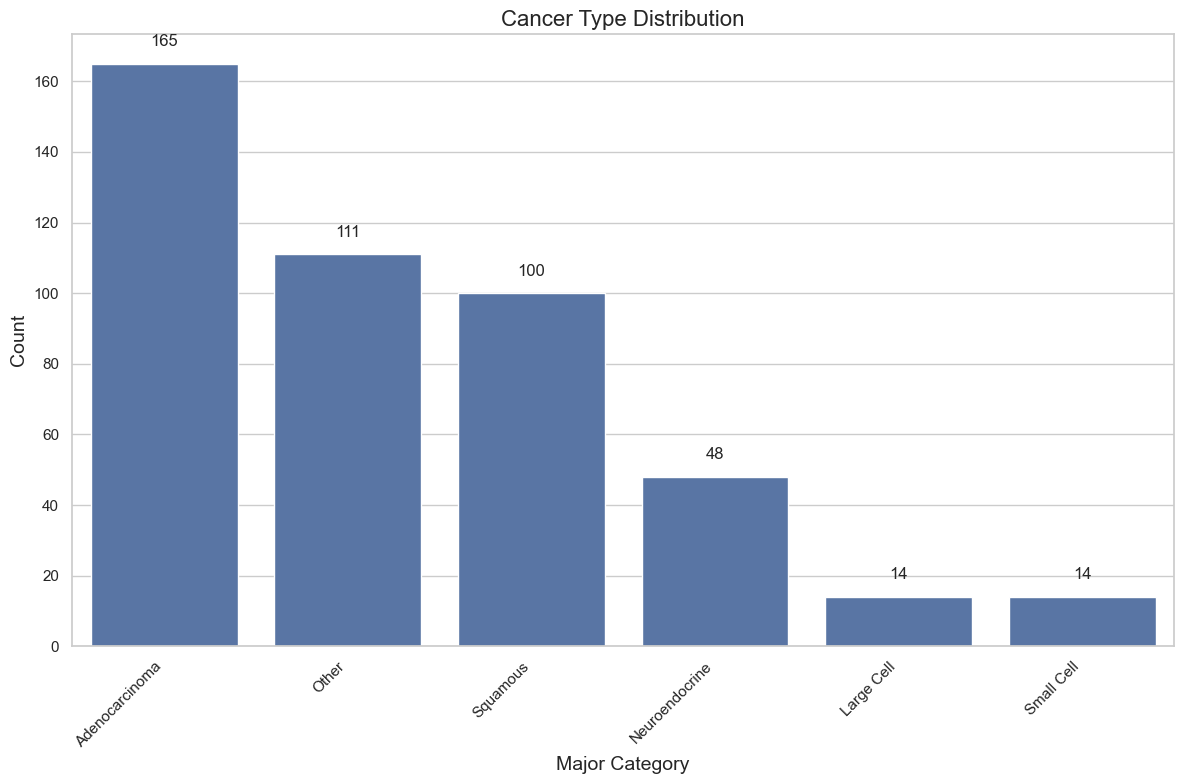

In [102]:
# Visualize cancer type distribution
visualize_cancer_distribution(merged_df, column='major_category', 
                             title='Cancer Type Distribution',
                             save_path='cancer_distribution.png')

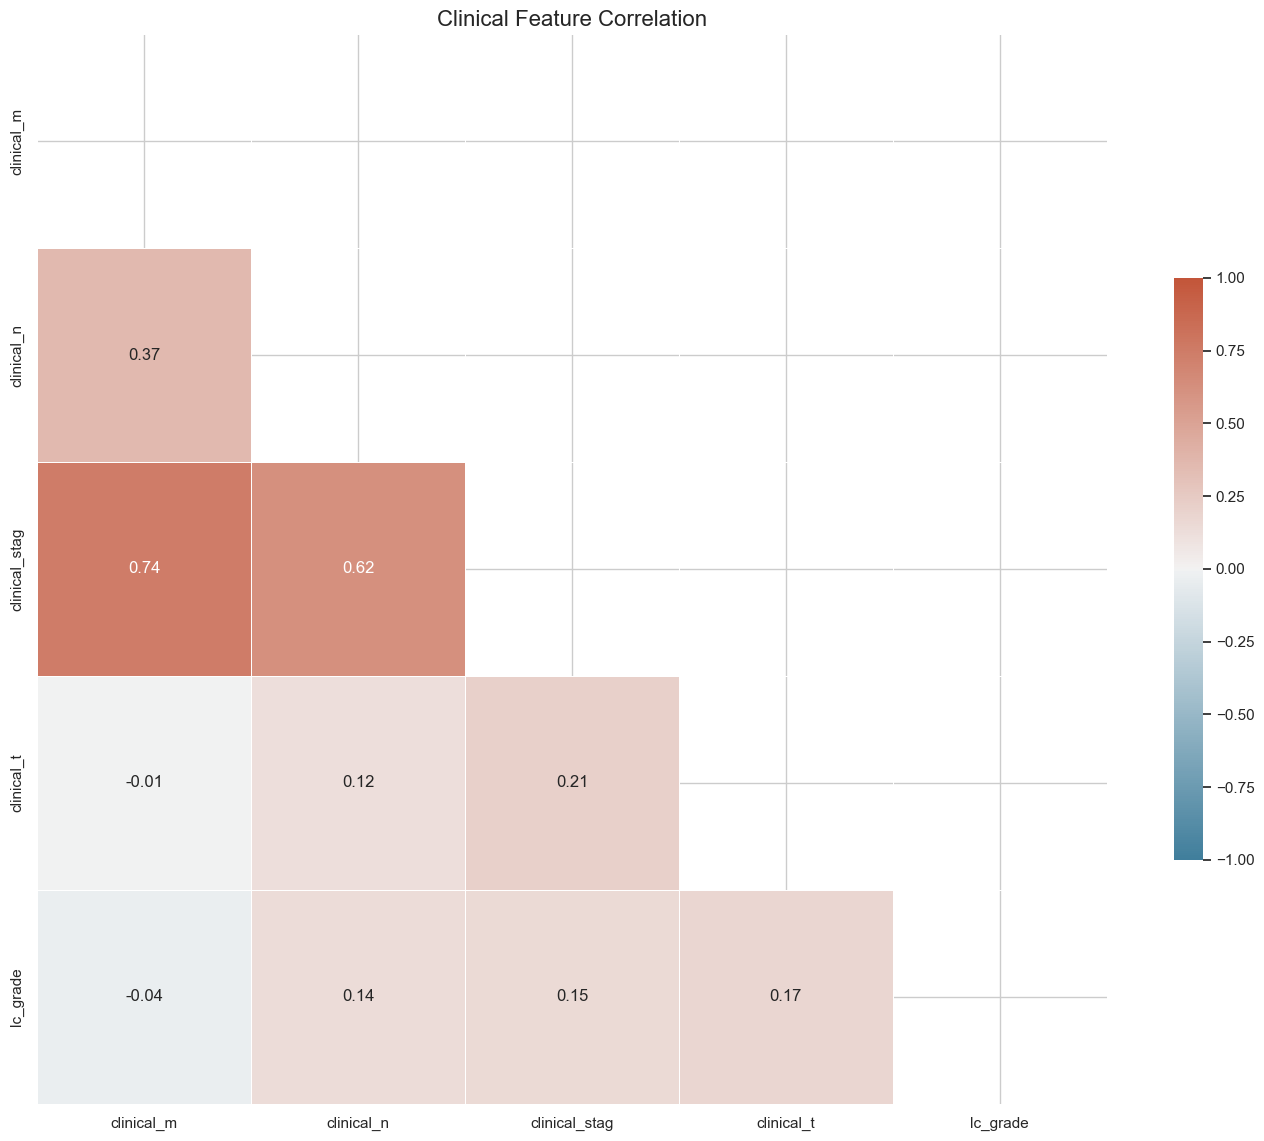

In [103]:
# Visualize feature correlation
# Select numeric columns for correlation analysis
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
# Select a subset of important features
important_features = [col for col in numeric_cols if col in ['lc_grade', 'clinical_t', 'clinical_n', 'clinical_m', 'clinical_stag']][:10]
visualize_feature_correlation(merged_df, features=important_features,
                             title='Clinical Feature Correlation',
                             save_path='feature_correlation.png')

<Figure size 1400x800 with 0 Axes>

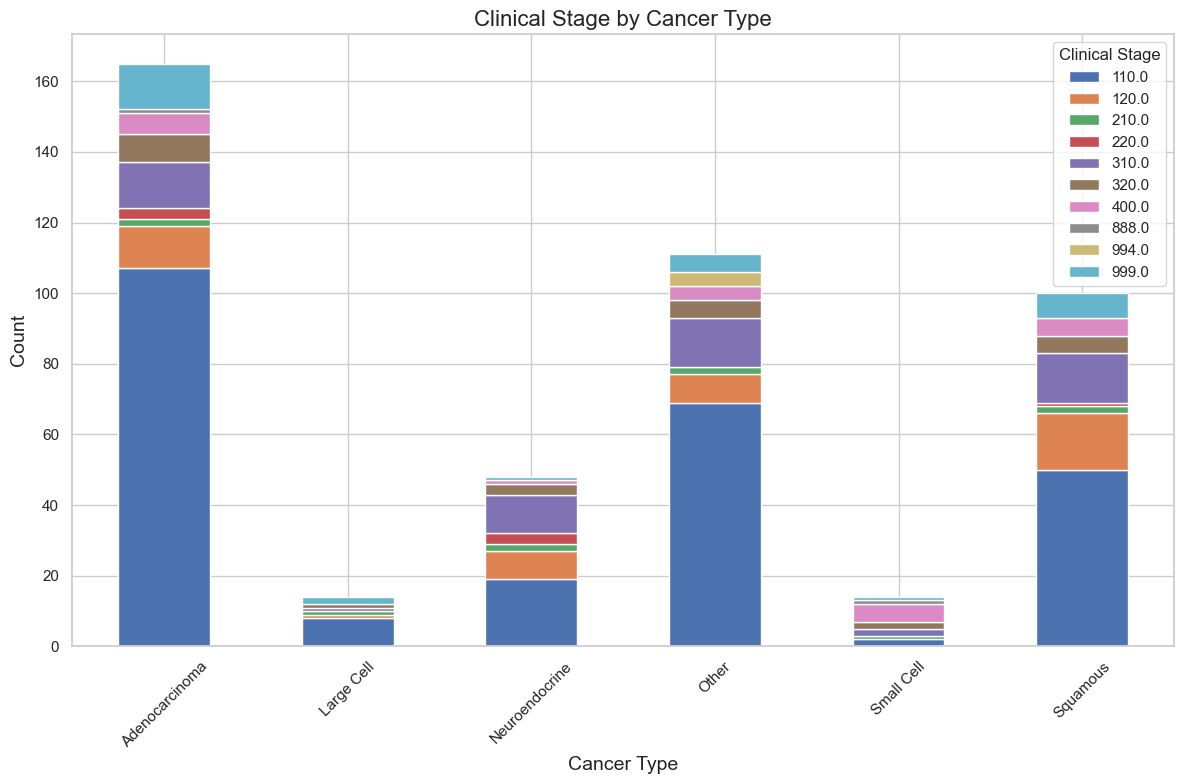

In [104]:
# Visualize clinical data by cancer type
# Create a grouped bar chart for clinical stage by cancer type
if 'clinical_stag' in merged_df.columns and 'major_category' in merged_df.columns:
    plt.figure(figsize=(14, 8))
    stage_counts = pd.crosstab(merged_df['major_category'], merged_df['clinical_stag'])
    stage_counts.plot(kind='bar', stacked=True)
    plt.title('Clinical Stage by Cancer Type', fontsize=16)
    plt.xlabel('Cancer Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Clinical Stage')
    plt.tight_layout()
    plt.savefig('stage_by_cancer_type.png')
    plt.show()

## 4. Lung Nodule Detection and SVS Image Visualization

In this section, we'll visualize the SVS (Aperio Slide Virtual Slide) files of lung biopsies and detect lung nodules, which are small masses of tissue in the lung that may be cancerous or benign. These nodules are key features for cancer type classification.

In [105]:
# Import SVS visualization module
from svs_visualization import (
    load_svs_slide, get_slide_info, visualize_slide_thumbnail,
    visualize_slide_region, visualize_slide_grid, detect_tissue_regions,
    visualize_tissue_detection, extract_tissue_tiles, visualize_extracted_tiles,
    visualize_magnification_levels, visualize_slide_with_annotations
)

In [106]:
import os

# Set path to SVS files
svs_dir = [
    "data/batch_3_adenocarcinoma",
    "data/batch_5_squamous", 
    "data/batch_8_BAC"
]

# Check if directory exists
for dir_path in svs_dir:
    if not os.path.exists(dir_path):
        print(f"Error: SVS directory not found: {dir_path}")
    else:
        print(f"Found: {dir_path}")
        
        # List SVS files inside this directory
        svs_files = [f for f in os.listdir(dir_path) if f.endswith('.svs')]
        print(f"Found {len(svs_files)} SVS files in {dir_path}")
        
        # Display first few files
        if svs_files:
            print("\nFirst 5 SVS files:")
            for i, f in enumerate(svs_files[:5]):
                print(f"  {i+1}. {f}")


Found: data/batch_3_adenocarcinoma
Found 135 SVS files in data/batch_3_adenocarcinoma

First 5 SVS files:
  1. 10120.svs
  2. 10121.svs
  3. 10122.svs
  4. 10132.svs
  5. 10133.svs
Found: data/batch_5_squamous
Found 110 SVS files in data/batch_5_squamous

First 5 SVS files:
  1. 10112.svs
  2. 10113.svs
  3. 10114.svs
  4. 10115.svs
  5. 10116.svs
Found: data/batch_8_BAC
Found 155 SVS files in data/batch_8_BAC

First 5 SVS files:
  1. 10025.svs
  2. 10026.svs
  3. 10027.svs
  4. 10028.svs
  5. 10147.svs


Selected sample SVS file: data/batch_8_BAC\10025.svs

Slide Information:
  Dimensions: (74893, 79065)
  Level Count: 4
  Level Dimensions: ((74893, 79065), (18723, 19766), (4680, 4941), (2340, 2470))
  Level Downsamples: (1.0, 4.000052001084807, 16.002299635701274, 32.00783850652272)


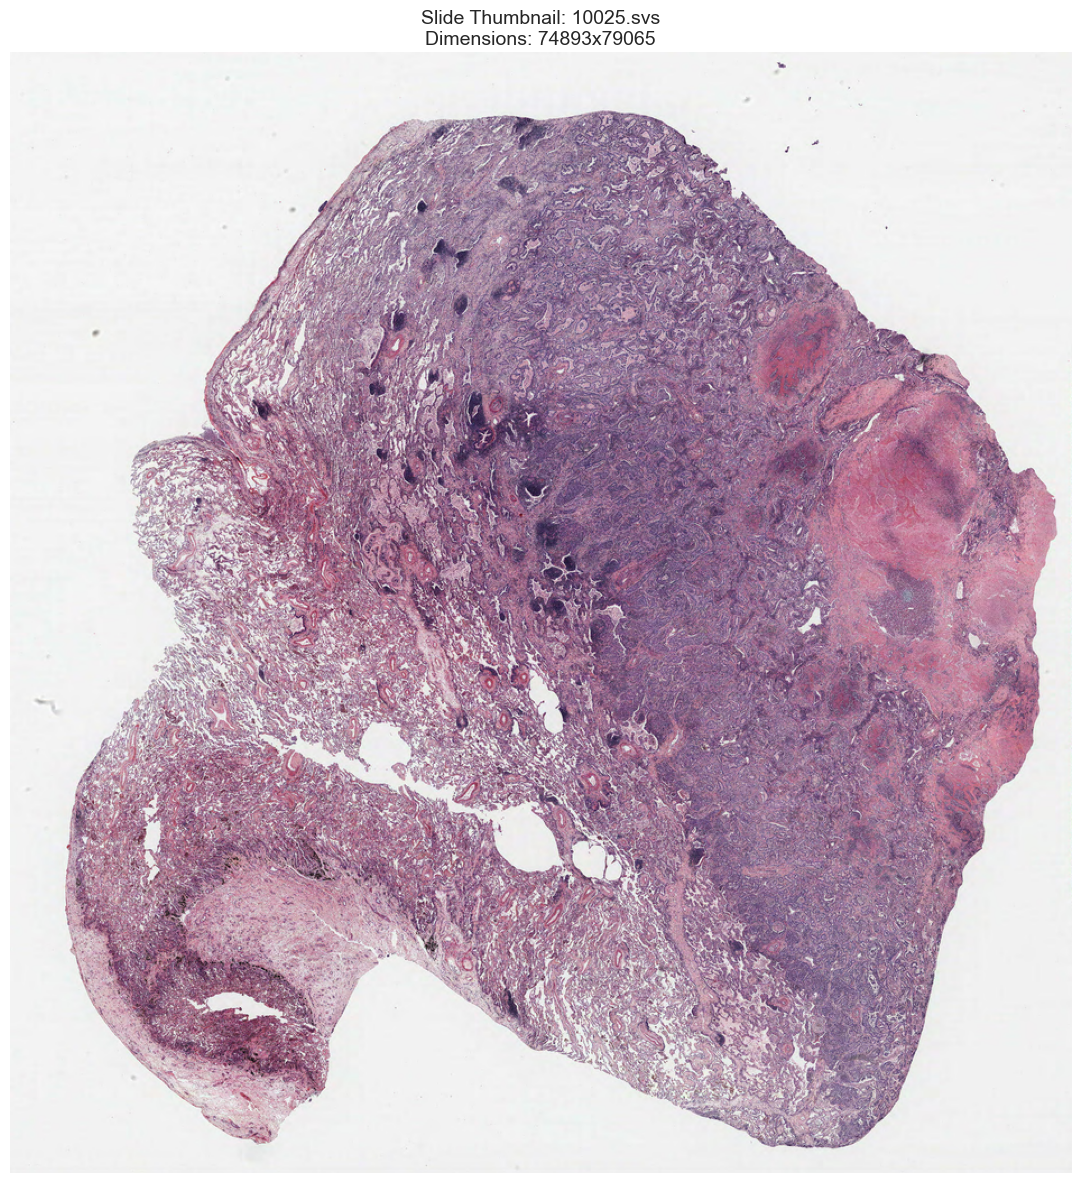

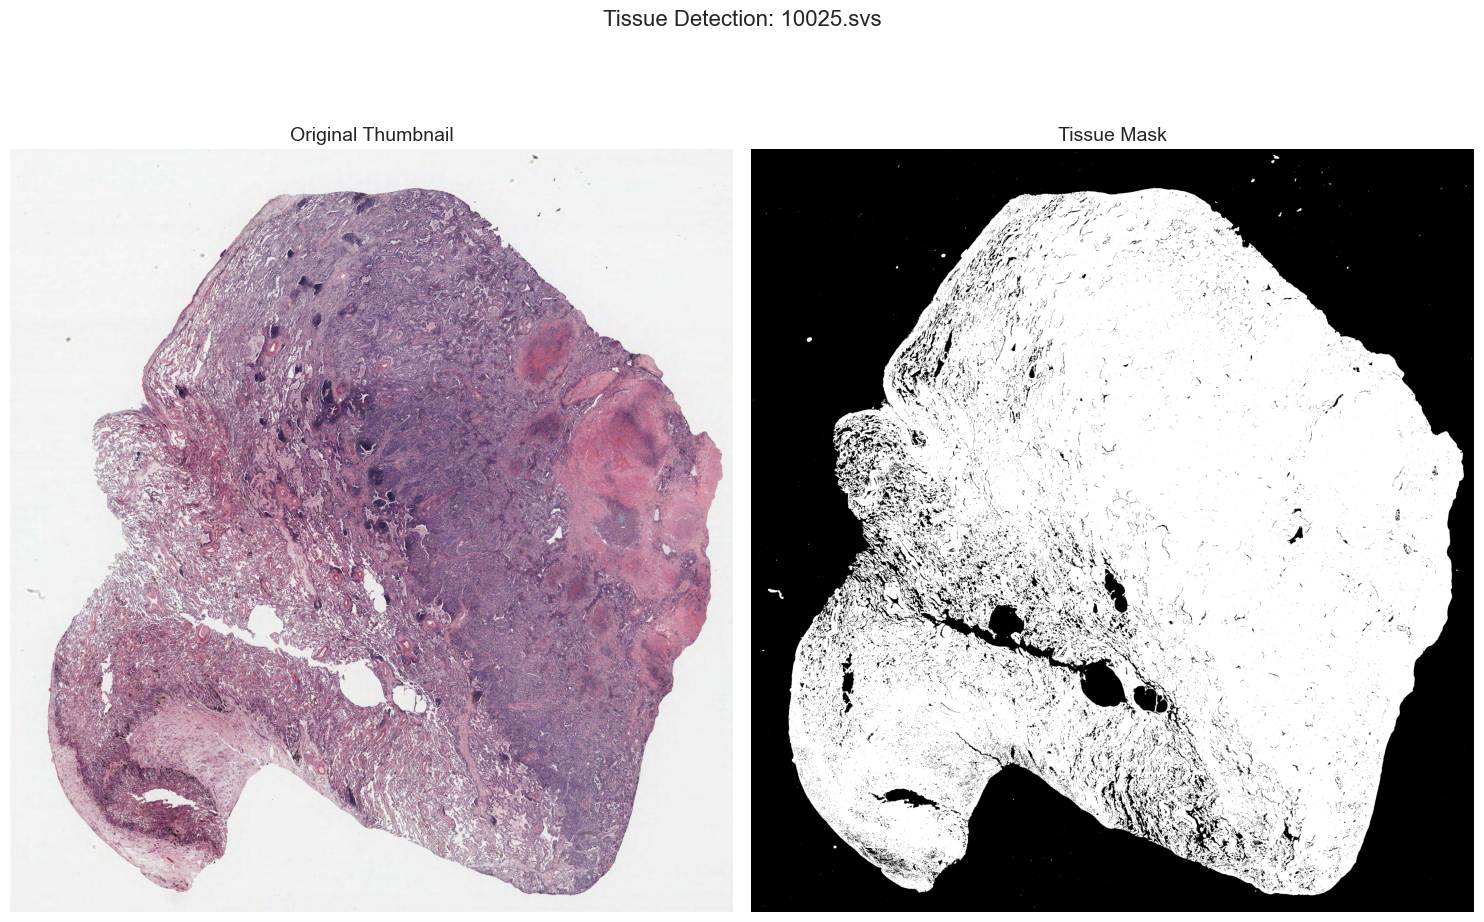

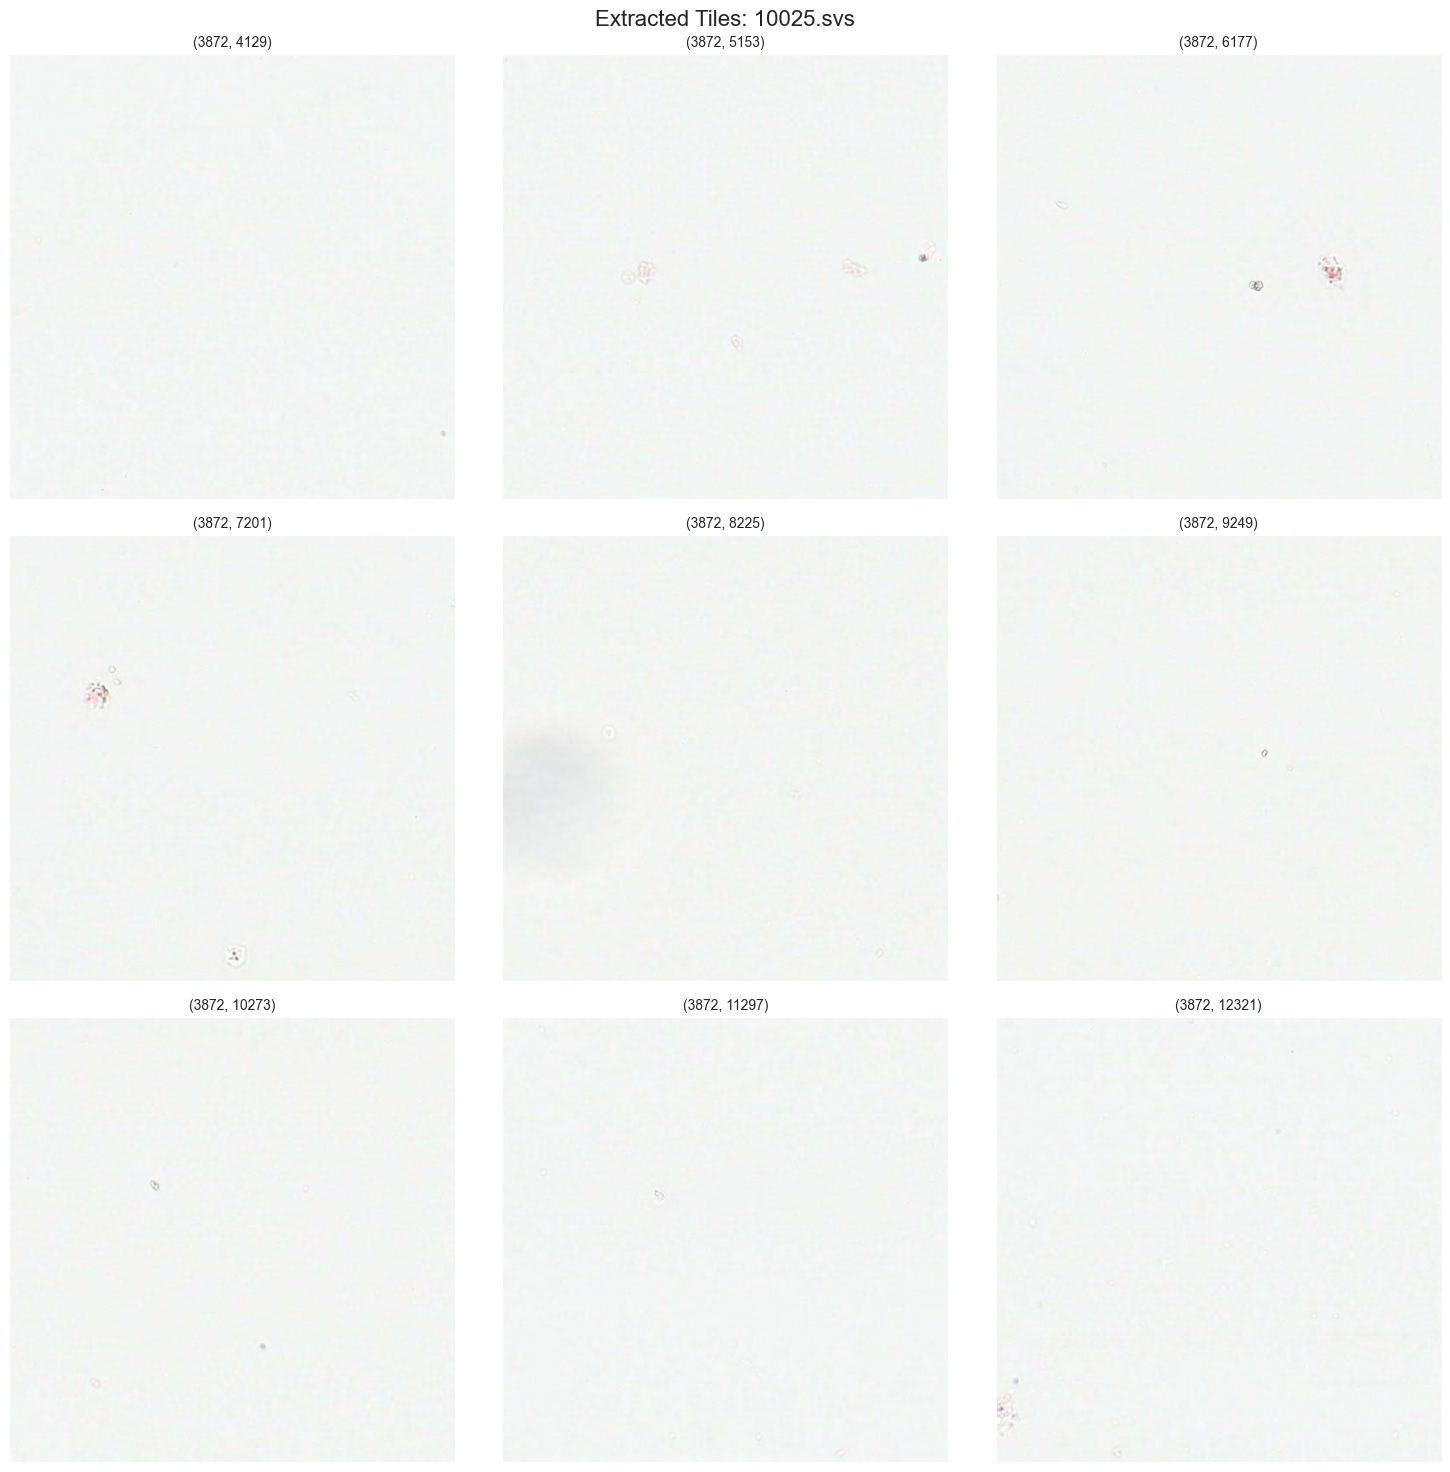

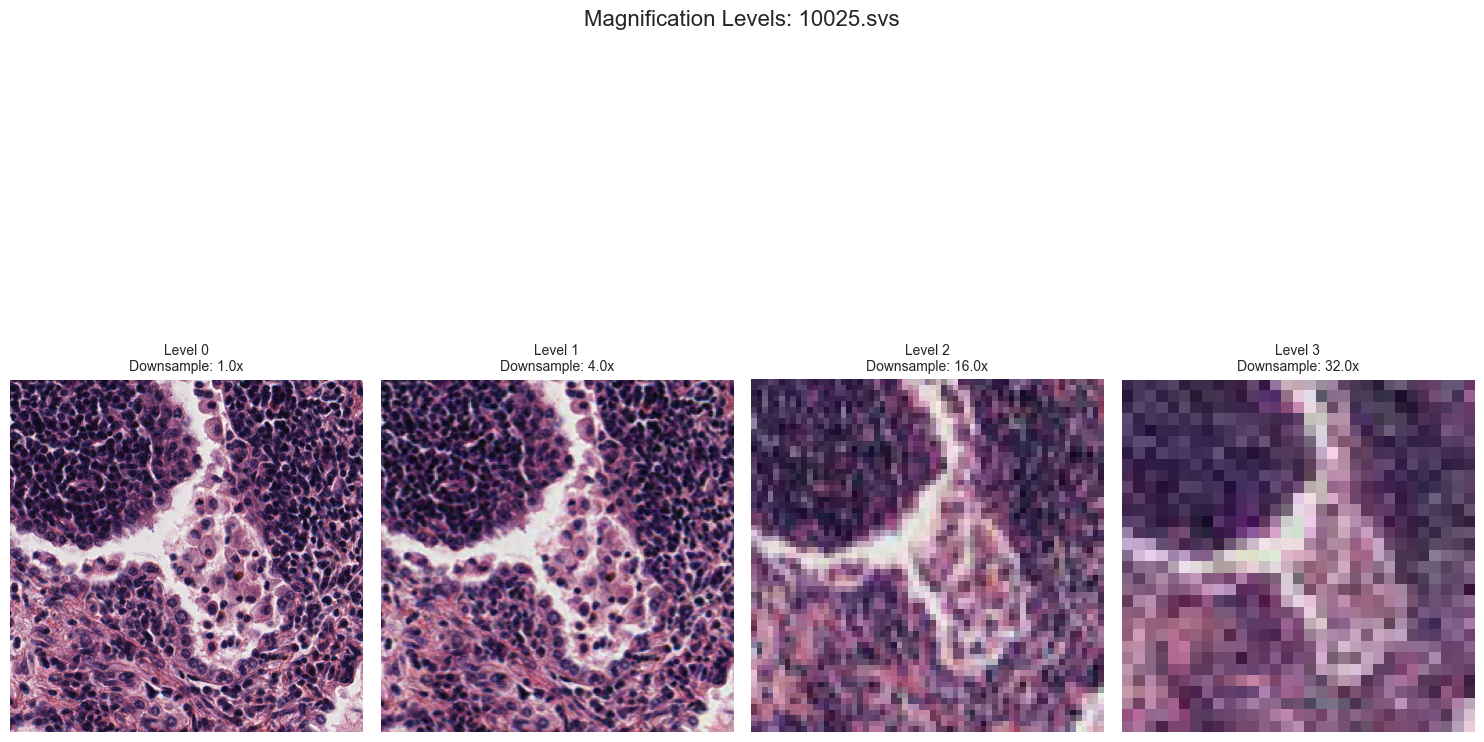

In [107]:
# Visualize a sample SVS file
if 'svs_files' in locals() and svs_files:
    # Select a sample SVS file
    sample_svs_path = os.path.join(dir_path, svs_files[0])
    print(f"Selected sample SVS file: {sample_svs_path}")
    
    # Load slide
    slide = load_svs_slide(sample_svs_path)
    if slide is not None:
        # Get slide info
        info = get_slide_info(slide)
        
        # Display slide info
        print("\nSlide Information:")
        print(f"  Dimensions: {info['dimensions']}")
        print(f"  Level Count: {info['level_count']}")
        print(f"  Level Dimensions: {info['level_dimensions']}")
        print(f"  Level Downsamples: {info['level_downsamples']}")
        
        # Visualize slide thumbnail
        thumbnail = visualize_slide_thumbnail(slide, title=f"Slide Thumbnail: {os.path.basename(sample_svs_path)}", 
                                            figsize=(12, 12), save_path="slide_thumbnail.png")
        
        # Detect tissue regions
        tissue_mask, thumbnail, scale_factors = detect_tissue_regions(slide)
        
        # Visualize tissue detection
        visualize_tissue_detection(slide, tissue_mask, thumbnail, 
                                 title=f"Tissue Detection: {os.path.basename(sample_svs_path)}", 
                                 figsize=(15, 10), save_path="tissue_detection.png")
        
        # Extract tissue tiles
        tiles = extract_tissue_tiles(slide, tissue_mask, scale_factors, level=0, tile_size=1024, max_tiles=9)
        
        # Visualize extracted tiles
        visualize_extracted_tiles(tiles, grid_size=(3, 3), 
                                title=f"Extracted Tiles: {os.path.basename(sample_svs_path)}", 
                                figsize=(15, 15), save_path="extracted_tiles.png")
        
        # Visualize magnification levels
        visualize_magnification_levels(slide, title=f"Magnification Levels: {os.path.basename(sample_svs_path)}", 
                                     figsize=(15, 10), save_path="magnification_levels.png")
    else:
        print("Error: Could not load sample SVS file")
else:
    print("No SVS files found")

In [1]:
import pandas as pd
import os
from openslide import OpenSlide
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour charger les données
def load_data():
    clinical_path = "D:/PLUMOSCAN/PulmoScan/data/lung_cancer.csv"
    pathology_path = "D:/PLUMOSCAN/PulmoScan/data/Pathology_Images.csv"
    
    if not os.path.exists(clinical_path) or not os.path.exists(pathology_path):
        print(f"Data files not found: {clinical_path}, {pathology_path}")
        return None, None
    
    clinical = pd.read_csv(clinical_path)
    pathology = pd.read_csv(pathology_path)
    
    # Fusionner les données pour ajouter major_category (similaire à data_understanding.py)
    if 'pid' in clinical.columns and 'pid' in pathology.columns:
        merged_df = pd.merge(clinical, pathology, on='pid', how='inner')
        # Supposons que cancer_type vient de clinical et devient major_category
        if 'cancer_type' in merged_df.columns:
            merged_df['major_category'] = merged_df['cancer_type']
        else:
            print("Column 'cancer_type' not found in merged data")
            return clinical, None
    else:
        print("Column 'pid' not found in one of the datasets")
        return clinical, None
    
    return clinical, merged_df

# Fonction pour charger une diapositive SVS
def load_svs_slide(slide_path):
    try:
        slide = OpenSlide(slide_path)
        return slide
    except Exception as e:
        print(f"Error loading SVS slide {slide_path}: {e}")
        return None

# Fonction pour visualiser une miniature
def visualize_slide_thumbnail(slide, title, save_path):
    try:
        # Obtenir une miniature (par exemple, 1000x1000 pixels)
        thumbnail = slide.read_region((0, 0), 0, (1000, 1000))
        thumbnail = thumbnail.convert('RGB')
        
        # Afficher et sauvegarder
        plt.figure(figsize=(5, 5))
        plt.imshow(thumbnail)
        plt.title(title)
        plt.axis('off')
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
        print(f"Saved thumbnail to {save_path}")
    except Exception as e:
        print(f"Error visualizing slide: {e}")

In [2]:
# Visualize slides by cancer type

# D'abord charger les données si elles ne sont pas déjà disponibles
if 'clinical' not in locals() or 'pathology' not in locals():
    clinical, pathology = load_data()

# Debugging : Vérifier le contenu de pathology
print("Checking pathology data...")
print(f"pathology is None: {pathology is None}")
if pathology is not None:
    print(f"pathology type: {type(pathology)}")
    print(f"pathology columns: {pathology.columns.tolist()}")
    if 'major_category' in pathology.columns:
        print(f"Unique major_category values: {pathology['major_category'].dropna().unique()}")

# Ensuite vérifier que pathology est bien un DataFrame et qu'elle a la colonne nécessaire
if pathology is not None and hasattr(pathology, 'columns') and 'major_category' in pathology.columns:
    # Get unique cancer types
    cancer_types = pathology['major_category'].dropna().unique()
    
    print(f"Found {len(cancer_types)} cancer types")
    
    # Create output directory
    output_dir = "D:/PLUMOSCAN/PulmoScan/cancer_type_visualizations"
    os.makedirs(output_dir, exist_ok=True)
    
    # Vérifier aussi que svs_files existe
    if 'svs_files' not in locals():
        svs_dir = "D:/PLUMOSCAN/PulmoScan/data"  # Ajusté pour pointer vers le bon répertoire
        svs_files = [f for f in os.listdir(svs_dir) if f.endswith('.svs')] if os.path.exists(svs_dir) else []
        print(f"Found {len(svs_files)} SVS files in {svs_dir}")
    
    # Process each cancer type (limit to 2 for demonstration)
    for cancer_type in list(cancer_types)[:2]:
        # Get slides for this cancer type
        type_df = pathology[pathology['major_category'] == cancer_type]
        
        # Get list of image filenames
        if 'image_path' in type_df.columns:  # Ajusté pour utiliser image_path au lieu de image_filename
            type_files = type_df['image_path'].tolist()
            
            # Extract just the filename from the path (e.g., "11331.svs" from the full path)
            type_filenames = [os.path.basename(f) for f in type_files]
            
            # Filter to files that exist in the directory
            existing_files = [f for f in type_filenames if f in svs_files]
            
            # Select a sample (up to 2 slides)
            sample_files = existing_files[:2]
            
            if sample_files:
                print(f"\nProcessing {len(sample_files)} slides for cancer type: {cancer_type}")
                
                # Create cancer type directory
                type_dir = os.path.join(output_dir, str(cancer_type).replace(' ', '_'))
                os.makedirs(type_dir, exist_ok=True)
                
                # Process each slide
                for i, filename in enumerate(sample_files):
                    try:
                        # Load slide
                        slide_path = os.path.join(svs_dir, filename)
                        slide = load_svs_slide(slide_path)
                        
                        if slide is not None:
                            # Visualize slide thumbnail
                            visualize_slide_thumbnail(slide, 
                                                    title=f"{cancer_type}: {filename}", 
                                                    save_path=os.path.join(type_dir, f"thumbnail_{i+1}.png"))
                            
                            # Close slide
                            slide.close()
                    except Exception as e:
                        print(f"Error processing slide {filename}: {e}")
            else:
                print(f"No slides found for cancer type: {cancer_type}")
        else:
            print("'image_path' column not found in pathology data")
    
    print(f"\nProcessed slides by cancer type. Visualizations saved to '{output_dir}' directory.")
else:
    print("Cannot group slides by cancer type: pathology data not loaded or 'major_category' column missing")

Column 'cancer_type' not found in merged data
Checking pathology data...
pathology is None: True
Cannot group slides by cancer type: pathology data not loaded or 'major_category' column missing


## 5. Data Preprocessing

In this section, we'll preprocess the pathology images for model training.

In [110]:
# Import data preprocessing module
from data_preprocessing import (
    create_directories, load_metadata, load_svs_slide,
    extract_roi, extract_tissue_regions, preprocess_image,
    apply_augmentation, process_slides, analyze_processed_data
)

In [111]:
# Create directories for processed images
create_directories()

All directories created successfully.


In [112]:
# Load metadata
metadata = load_metadata()
if metadata is None:
    print("Error: Could not load metadata. Exiting.")

Loading prepared modeling data...
Renamed column 'image_path' to 'image_filename'
Loaded metadata with 250 entries


In [114]:
# Set image directories
image_dirs = [
    "D:/PLUMOSCAN/PulmoScan/data/batch_3_adenocarcinoma",
    "D:/PLUMOSCAN/PulmoScan/data/batch_5_squamous",
    "D:/PLUMOSCAN/PulmoScan/data/batch_8_BAC"
]

# Verify image directories
missing_dirs = [d for d in image_dirs if not os.path.exists(d)]
if missing_dirs:
    print(f"Error: The following image directories were not found: {missing_dirs}")
    raise FileNotFoundError(f"Missing directories: {missing_dirs}")
else:
    print("All image directories found:")
    for dir_path in image_dirs:
        print(f"{dir_path}: Exists")

All image directories found:
D:/PLUMOSCAN/PulmoScan/data/batch_3_adenocarcinoma: Exists
D:/PLUMOSCAN/PulmoScan/data/batch_5_squamous: Exists
D:/PLUMOSCAN/PulmoScan/data/batch_8_BAC: Exists


In [115]:
import inspect
print(inspect.signature(process_slides))

(metadata, image_dirs, output_dir='processed_images', max_slides=None, target_size=(512, 512), color_normalization=True, contrast_enhancement=True, augmentation_types=None, basic_augmentation_only=False)


In [116]:
import importlib
import data_preprocessing
importlib.reload(data_preprocessing)

<module 'data_preprocessing' from 'd:\\PLUMOSCAN\\PulmoScan\\data_preprocessing.py'>

In [117]:
from data_preprocessing import process_slides

In [118]:
import inspect
print(inspect.signature(process_slides))


(metadata, image_dirs, output_dir='processed_images', max_slides=None, target_size=(512, 512), color_normalization=True, contrast_enhancement=True, augmentation_types=None, basic_augmentation_only=False)


In [119]:
# Process slides (limit to 5 slides for testing)
# Note: This may take a long time to run
processed_df = process_slides(metadata, image_dir, max_slides=5,
                             target_size=(512, 512),
                             color_normalization=True,
                             contrast_enhancement=True)

Processing 5 slides...


100%|██████████| 5/5 [00:38<00:00,  7.70s/it]

Processed 550 images from 5 slides


In [120]:
# Analyze processed data
analyze_processed_data(processed_df)


Analyzing processed data:

Images per category:
category
Squamous_Cell_Carcinoma    220
Adenocarcinoma             220
Other                      110
Name: count, dtype: int64

Images per split:
split
train    363
test     132
val       55
Name: count, dtype: int64

Images per category and split:
split                    test  train  val
category                                 
Adenocarcinoma             55    143   22
Other                      11     99    0
Squamous_Cell_Carcinoma    66    121   33


## 6. Advanced Visualization

In this section, we'll create more advanced visualizations of the processed data.

In [121]:
# Visualize augmentation examples
# Define a simple augmentation function for demonstration
def demo_augmentation(image):
    # Convert to numpy array
    img_array = np.array(image)
    
    # Apply random brightness adjustment
    brightness_factor = random.uniform(0.8, 1.2)
    img_array = np.clip(img_array * brightness_factor, 0, 255).astype(np.uint8)
    
    # Convert back to PIL Image
    return Image.fromarray(img_array)

# Find a sample image path from processed images (if available)
sample_image_path = None
try:
    import glob
    image_files = glob.glob('processed_images/train/*/*.png')
    if image_files:
        sample_image_path = image_files[0]
        visualize_augmentation_examples(sample_image_path, demo_augmentation, n_augmentations=5,
                                      title='Augmentation Examples', save_path='augmentation_examples.png')
    else:
        print("No processed images found. Process slides first to visualize augmentations.")
except Exception as e:
    print(f"Error visualizing augmentation examples: {e}")

In [122]:
# Visualize preprocessing steps
# Define preprocessing functions for demonstration
def resize_image(image):
    return image.resize((256, 256), Image.LANCZOS)

def enhance_contrast(image):
    img_array = np.array(image)
    if len(img_array.shape) == 3:  # RGB image
        img_lab = cv2.cvtColor(img_array, cv2.COLOR_RGB2LAB)
        l_channel = img_lab[:, :, 0]
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l_channel)
        img_lab[:, :, 0] = cl
        img_array = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)
    return Image.fromarray(img_array)

def normalize_image(image):
    img_array = np.array(image).astype(float) / 255.0
    return Image.fromarray((img_array * 255).astype(np.uint8))

# Find a sample image path
if sample_image_path:
    preprocessing_funcs = [resize_image, enhance_contrast, normalize_image]
    func_names = ['Resize', 'Enhance Contrast', 'Normalize']
    visualize_preprocessing_steps(sample_image_path, preprocessing_funcs, func_names,
                                title='Preprocessing Steps', save_path='preprocessing_steps.png')
else:
    print("No sample image available for preprocessing visualization.")

In [123]:
# Visualize class balance after processing (if processed data is available)
try:
    processed_data_path = 'processed_images/processed_data.csv'
    if os.path.exists(processed_data_path):
        processed_df = pd.read_csv(processed_data_path)
        visualize_class_balance(processed_df, category_col='category', split_col='split',
                              title='Class Balance by Split', save_path='class_balance.png')
    else:
        print("Processed data not found. Process slides first to visualize class balance.")
except Exception as e:
    print(f"Error visualizing class balance: {e}")

In [124]:
# Visualize t-SNE embedding of clinical features (if available)
try:
    # Select numeric features for t-SNE
    numeric_features = merged_df.select_dtypes(include=[np.number])
    # Remove columns with too many missing values
    valid_features = numeric_features.loc[:, numeric_features.isnull().mean() < 0.3]
    
    if not valid_features.empty and 'major_category' in merged_df.columns:
        # Fill remaining missing values with mean
        features_filled = valid_features.fillna(valid_features.mean())
        # Get labels
        labels = merged_df['major_category'].fillna('Unknown')
        
        # Visualize t-SNE embedding
        visualize_tsne_embedding(features_filled, labels, 
                               title='t-SNE Embedding of Clinical Features',
                               save_path='tsne_embedding.png')
    else:
        print("Not enough valid features for t-SNE visualization.")
except Exception as e:
    print(f"Error visualizing t-SNE embedding: {e}")

In [125]:
# Visualize image statistics (if processed images are available)
try:
    if os.path.exists('processed_images'):
        visualize_image_statistics('processed_images', pattern='*/*.png', max_images=100,
                                 title='Processed Image Statistics', save_path='image_statistics.png')
    else:
        print("Processed images not found. Process slides first to visualize image statistics.")
except Exception as e:
    print(f"Error visualizing image statistics: {e}")

Analyzing images: 0it [00:00, ?it/s]


Error visualizing image statistics: zero-size array to reduction operation minimum which has no identity


## 7. Balanced Data Augmentation

In this section, we'll apply balanced data augmentation to address class imbalance in the dataset.

In [126]:
# Import balanced augmentation module
from balanced_augmentation import (
    load_processed_data, analyze_class_distribution,
    apply_advanced_augmentation, create_balanced_dataset,
    analyze_balanced_dataset
)

In [127]:
# Load processed data
processed_df = load_processed_data()
if processed_df is None:
    print("Error: Could not load processed data. Exiting.")

Loaded processed data with 550 entries


In [128]:
# Analyze class distribution and determine augmentation factors
augmentation_factors = analyze_class_distribution(processed_df)


Training images per category:
category
Adenocarcinoma             143
Squamous_Cell_Carcinoma    121
Other                       99
Name: count, dtype: int64

Augmentation factors per category:
  Adenocarcinoma: 1x
  Squamous_Cell_Carcinoma: 2x
  Other: 2x


In [129]:
# Create balanced dataset
# Note: This may take a long time to run
balanced_df = create_balanced_dataset(processed_df, augmentation_factors)


Processing train split...


Processing Adenocarcinoma: 100%|██████████| 143/143 [00:06<00:00, 21.73it/s]



Processing val split...


Processing Squamous_Cell_Carcinoma: 100%|██████████| 33/33 [00:02<00:00, 14.36it/s]
Processing Other: 0it [00:00, ?it/s]
Processing Adenocarcinoma: 100%|██████████| 22/22 [00:00<00:00, 30.93it/s]



Processing test split...


Processing Adenocarcinoma: 100%|██████████| 55/55 [00:01<00:00, 27.83it/s]


Created balanced dataset with 770 images


In [130]:
# Analyze balanced dataset
analyze_balanced_dataset(balanced_df)


Analyzing balanced dataset:

Images per category:
category
Squamous_Cell_Carcinoma    341
Adenocarcinoma             220
Other                      209
Name: count, dtype: int64

Images per split:
split
train    583
test     132
val       55
Name: count, dtype: int64

Images per category and split:
split                    test  train  val
category                                 
Adenocarcinoma             55    143   22
Other                      11    198    0
Squamous_Cell_Carcinoma    66    242   33

Comparison of original and balanced training sets:
                         Original  Balanced
category                                   
Adenocarcinoma                143       143
Other                          99       198
Squamous_Cell_Carcinoma       121       242


## 7. modeling
1. Chargement des données à partir de `balanced_data_subset.csv`.
2. Analyse de la distribution des classes et calcul des facteurs d'augmentation.
3. Entraînement du modèle ResNet18 sur l'ensemble d'entraînement.


In [8]:
# Load processed data
import pandas as pd

DATA_PATH = "D:/PLUMOSCAN/PulmoScan/processed_images/balanced_data_subset.csv"
processed_df = pd.read_csv(DATA_PATH)

if processed_df is None:
    print("Error: Could not load processed data. Exiting.")
else:
    print(f"Loaded processed data with {len(processed_df)} entries")

Loaded processed data with 12000 entries


In [9]:
# Analyze class distribution and determine augmentation factors
def analyze_class_distribution(df):
    print("Training images per category:")
    train_df = df[df['split'] == 'train']
    class_counts = train_df['major_category'].value_counts()
    print(class_counts)
    
    # Calculer les facteurs d'augmentation (si nécessaire)
    max_count = class_counts.max()
    augmentation_factors = {}
    for category, count in class_counts.items():
        factor = max_count / count
        augmentation_factors[category] = round(factor)
    
    print("\nAugmentation factors per category:")
    for category, factor in augmentation_factors.items():
        print(f"{category}: {factor}x")

analyze_class_distribution(processed_df)

Training images per category:
major_category
Adenocarcinoma             2667
Other                      2667
Squamous_Cell_Carcinoma    2666
Name: count, dtype: int64

Augmentation factors per category:
Adenocarcinoma: 1x
Other: 1x
Squamous_Cell_Carcinoma: 1x


In [6]:
# Train the model
from train_model import train_model

best_val_accuracy = train_model(model_name='resnet18', force_cpu=False, num_epochs=10)
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Using device: cuda
Categories: ['Other', 'Adenocarcinoma', 'Squamous_Cell_Carcinoma']
Number of classes: 3
Class distribution in full dataset:
split  major_category         
test   Adenocarcinoma              500
       Other                       500
       Squamous_Cell_Carcinoma     500
train  Adenocarcinoma             1667
       Other                      1667
       Squamous_Cell_Carcinoma    1666
val    Adenocarcinoma              500
       Other                       500
       Squamous_Cell_Carcinoma     500
dtype: int64

Class distribution in train set:
major_category
Other                      1667
Adenocarcinoma             1667
Squamous_Cell_Carcinoma    1666
Name: count, dtype: int64

Class distribution in validation set:
major_category
Squamous_Cell_Carcinoma    500
Other                      500
Adenocarcinoma             500
Name: count, dtype: int64
Class weights: tensor([0.9998, 0.9998, 1.0004], device='cuda:0')

Loading dataset...
Train set: 5000 samples
Validatio

In [7]:
# Train the model
from train_model import train_model

best_val_accuracy = train_model(model_name='efficientnetb0', force_cpu=False, num_epochs=10)
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Using device: cuda
Categories: ['Other', 'Adenocarcinoma', 'Squamous_Cell_Carcinoma']
Number of classes: 3
Class distribution in full dataset:
split  major_category         
test   Adenocarcinoma              500
       Other                       500
       Squamous_Cell_Carcinoma     500
train  Adenocarcinoma             1667
       Other                      1667
       Squamous_Cell_Carcinoma    1666
val    Adenocarcinoma              500
       Other                       500
       Squamous_Cell_Carcinoma     500
dtype: int64

Class distribution in train set:
major_category
Other                      1667
Adenocarcinoma             1667
Squamous_Cell_Carcinoma    1666
Name: count, dtype: int64

Class distribution in validation set:
major_category
Squamous_Cell_Carcinoma    500
Other                      500
Adenocarcinoma             500
Name: count, dtype: int64
Class weights: tensor([0.9998, 0.9998, 1.0004], device='cuda:0')

Loading dataset...
Train set: 5000 samples
Validatio

100%|██████████| 20.5M/20.5M [00:27<00:00, 773kB/s] 


Starting training...
Epoch 1/10
Train Loss: 1.0973
Validation Loss: 1.1230
Validation Accuracy: 0.3367
Checkpoint saved at epoch 1: D:/PLUMOSCAN/PulmoScan/checkpoint_efficientnetb0.pth
Best model saved: D:/PLUMOSCAN/PulmoScan/best_model_efficientnetb0.pth (Val Accuracy: 0.3367)
Epoch 2/10
Train Loss: 1.0905
Validation Loss: 1.1346
Validation Accuracy: 0.3207
Checkpoint saved at epoch 2: D:/PLUMOSCAN/PulmoScan/checkpoint_efficientnetb0.pth
Patience counter: 1/3
Epoch 3/10
Train Loss: 1.0808
Validation Loss: 1.1563
Validation Accuracy: 0.3080
Checkpoint saved at epoch 3: D:/PLUMOSCAN/PulmoScan/checkpoint_efficientnetb0.pth
Patience counter: 2/3
Epoch 4/10
Train Loss: 1.0697
Validation Loss: 1.1652
Validation Accuracy: 0.3220
Checkpoint saved at epoch 4: D:/PLUMOSCAN/PulmoScan/checkpoint_efficientnetb0.pth
Patience counter: 3/3
Early stopping triggered!
Training completed!
Best validation accuracy: 0.3367
Best validation accuracy: 0.3367


In [11]:
# Train the model
from train_model import train_model

best_val_accuracy = train_model(model_name='resnet18', force_cpu=False, num_epochs=10)
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Using device: cuda
Categories: ['Adenocarcinoma', 'Squamous_Cell_Carcinoma', 'Other']
Number of classes: 3
Class distribution in full dataset:
split  major_category         
test   Adenocarcinoma              667
       Other                       667
       Squamous_Cell_Carcinoma     666
train  Adenocarcinoma             2667
       Other                      2667
       Squamous_Cell_Carcinoma    2666
val    Adenocarcinoma              667
       Other                       667
       Squamous_Cell_Carcinoma     666
dtype: int64

Class distribution in train set:
major_category
Adenocarcinoma             2667
Other                      2667
Squamous_Cell_Carcinoma    2666
Name: count, dtype: int64

Class distribution in validation set:
major_category
Adenocarcinoma             667
Other                      667
Squamous_Cell_Carcinoma    666
Name: count, dtype: int64
Class weights: tensor([0.9999, 1.0003, 0.9999], device='cuda:0')

Loading dataset...
Train set: 8000 samples
Validatio

In [12]:
# Train the model
from train_model import train_model

best_val_accuracy = train_model(model_name='efficientnetb0', force_cpu=False, num_epochs=10)
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Using device: cuda
Categories: ['Adenocarcinoma', 'Squamous_Cell_Carcinoma', 'Other']
Number of classes: 3
Class distribution in full dataset:
split  major_category         
test   Adenocarcinoma              667
       Other                       667
       Squamous_Cell_Carcinoma     666
train  Adenocarcinoma             2667
       Other                      2667
       Squamous_Cell_Carcinoma    2666
val    Adenocarcinoma              667
       Other                       667
       Squamous_Cell_Carcinoma     666
dtype: int64

Class distribution in train set:
major_category
Adenocarcinoma             2667
Other                      2667
Squamous_Cell_Carcinoma    2666
Name: count, dtype: int64

Class distribution in validation set:
major_category
Adenocarcinoma             667
Other                      667
Squamous_Cell_Carcinoma    666
Name: count, dtype: int64
Class weights: tensor([0.9999, 1.0003, 0.9999], device='cuda:0')

Loading dataset...
Train set: 8000 samples
Validatio

## 7. Conclusion

In this notebook, we've performed comprehensive data understanding, preprocessing, and visualization for the cancer type classification task. The key steps included:

1. **Data Understanding**:
   - Loaded and explored clinical and pathology datasets
   - Analyzed cancer types and their distribution
   - Examined histology subtypes and clinical data

2. **Data Preprocessing**:
   - Created a pipeline for processing SVS files
   - Extracted regions of interest from pathology slides
   - Applied advanced preprocessing techniques including color normalization and contrast enhancement
   - Split data into train/val/test sets

3. **Data Visualization**:
   - Visualized cancer type distributions and clinical correlations
   - Demonstrated preprocessing steps and augmentation techniques
   - Created advanced visualizations like t-SNE embeddings and class balance analysis

4. **Balanced Data Augmentation**:
   - Analyzed class distribution
   - Applied advanced augmentation techniques
   - Created a balanced dataset for model training

The preprocessed, visualized, and balanced dataset is now ready for model training. The visualizations provide valuable insights into the data characteristics and preprocessing effects, which will help in designing an effective model architecture and training strategy.